# COURSE: A deep understanding of deep learning
## SECTION: Running models on a GPU
### LECTURE: Implementation
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202305

In [2]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import time

# Select the processor device

In [3]:
## Note: To run models on a GPU you must select from the menu:
#   -> Runtime
#     -> Change runtime type
#       -> Hardware accelerator
#         -> GPU

In [4]:
# use GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


# Build a simple model

In [5]:
net = nn.Sequential(
    nn.Linear(20,100),
    nn.ReLU(),
    nn.Linear(100,500),
    nn.ReLU(),
    nn.Linear(500,30),
    nn.ReLU(),
    nn.Linear(30,2)
      )

# Make some data

In [6]:
# just some random fluff
data   = torch.randn((1000,20)) # samples X features
labels = torch.randint(low=0,high=2,size=(1,1000))

# Send the model and the data to the GPU

In [7]:
# model
net.to(device)

# data
data   = data.to(device)
labels = labels.to(device)

In [8]:
data

tensor([[ 0.5601, -1.3845,  0.3491,  ..., -1.0905, -0.8670, -0.4304],
        [-1.9102, -3.2938, -1.1098,  ..., -0.8212,  0.8614, -0.4107],
        [ 0.8043, -0.1131, -2.3745,  ..., -1.7723,  1.6781,  0.3147],
        ...,
        [ 1.3336,  1.0660, -0.7447,  ...,  1.8585,  0.0816,  1.4404],
        [-2.3004,  0.9336,  0.0087,  ...,  0.6278, -2.6949, -1.5153],
        [ 1.0399, -0.0728, -0.0416,  ..., -0.0326,  1.0447,  0.8586]],
       device='cuda:0')

In [9]:
# you can also create data directly on the GPU
dataG = torch.randn((1000,20),device=device)
dataC = torch.randn((1000,20),device='cpu')

print(data.device)
print(dataG.device)
print(dataC.device)

cuda:0
cuda:0
cpu


# Getting results from the model

In [10]:
output = net(data)

In [11]:
output.device

device(type='cuda', index=0)

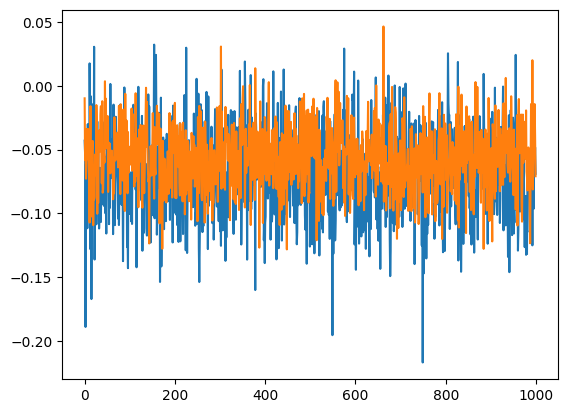

In [12]:
# try to plot the data
# The below line will give error because it is not bringing back data
# plt.plot(output.detach());

plt.plot(output.detach().cpu());

# Experiment: Computation time

In [13]:
# start the clock
starttime = time.process_time()

# move, run, retrieve
device = 'cuda:0'
net.to(device)
data   = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

# stop the clock
GPUtime = 1000*(time.process_time() - starttime)

In [14]:
# start the clock
starttime = time.process_time()

# move, run, retrieve
device = 'cpu'
net.to(device)
data   = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

# stop the clock
CPUtime = 1000*(time.process_time() - starttime)

In [15]:
# time in ms
[CPUtime,GPUtime]

[5.741744999999909, 2.9029219999996414]

In [16]:
# but maybe "sending" it to the CPU takes too much overhead?

In [17]:
# recreate network and data
net  = nn.Sequential(nn.Linear(20,100),nn.ReLU(),nn.Linear(100,500),nn.ReLU(),nn.Linear(500,30),nn.ReLU(),nn.Linear(30,2))
data = torch.randn((1000,20))

# rerun the experiment
starttime = time.process_time()
output    = net(data).detach()
CPUtime2  = 1000*(time.process_time() - starttime)

# report the results
[CPUtime2,CPUtime,GPUtime]

[3.8319570000000525, 5.741744999999909, 2.9029219999996414]